# Create LaBSE model

In [ ]:
import torch
from transformers import BertModel, BertTokenizerFast


tokenizer = BertTokenizerFast.from_pretrained("setu4993/LaBSE")
model = BertModel.from_pretrained("setu4993/LaBSE")
model = model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/367 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/13.6M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

# English test LaBSE



In [ ]:
english_sentences = [
    "dog",
    "Puppies are nice.",
    "I enjoy taking long walks along the beach with my dog.",
]
english_inputs = tokenizer(english_sentences, return_tensors="pt", padding=True)

with torch.no_grad():
    english_outputs = model(**english_inputs)

In [ ]:
english_embeddings = english_outputs.pooler_output
english_embeddings

tensor([[-0.1347, -0.0216, -0.1925,  ...,  0.6447, -0.1693, -0.4156],
        [-0.6227, -0.1059, -0.6587,  ..., -0.0912,  0.1238, -0.1917],
        [ 0.4266, -0.0935,  0.3129,  ..., -0.0335,  0.0573, -0.5042]])

In [ ]:
len(english_embeddings[1])

768

# Persian test LaBSE

In [ ]:
persian_sentences = [
    "سگ",
    "هاپو ها ناز هستند",
    "من از راهپیمایی طولانی با سگم کنار ساحل لذت می برم",
]

persian_inputs = tokenizer(persian_sentences, return_tensors="pt", padding=True)

with torch.no_grad():
    persian_outputs = model(**persian_inputs)

persian_embeddings = persian_outputs.pooler_output

In [ ]:
persian_embeddings

tensor([[-0.0840, -0.2151, -0.1613,  ...,  0.5942,  0.0879, -0.4846],
        [-0.7282, -0.3723, -0.4386,  ...,  0.0326, -0.3148, -0.4180],
        [ 0.2777, -0.3734,  0.0522,  ...,  0.1025,  0.0609, -0.6709]])

# Data Reading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Mostaghel Channels
tasnimnews_df = pd.read_excel('/content/drive/MyDrive/channels_data/mostaghel/Tasnimnews5000.xlsx')
snn_df = pd.read_excel('/content/drive/MyDrive/channels_data/mostaghel/snntv6000.xlsx')
tasnimnews_df['label'] = 'Independent'
snn_df['label'] = 'Independent'

# Osoolgara Channels
afsaran_df = pd.read_excel('/content/drive/MyDrive/channels_data/osolgara/afsaran_ir2000.xlsx')
sapahegods_df = pd.read_excel('/content/drive/MyDrive/channels_data/osolgara/sapahegods1133000.xlsx')
afsaran_df['label'] = 'Osoolgara'
sapahegods_df['label'] = 'Osoolgara'

# Eslahat Channels
baamdadeno_df = pd.read_excel('/content/drive/MyDrive/channels_data/eslahat/baamdadeno4000.xlsx')
entekhab_df = pd.read_excel('/content/drive/MyDrive/channels_data/eslahat/entekhab_ir4000.xlsx')
baamdadeno_df['label'] = 'Eslahat'
entekhab_df['label'] = 'Eslahat'

# Oposition Channels
besazimmmm_df = pd.read_excel('/content/drive/MyDrive/channels_data/oposition/besazimmmm2000.xlsx')
freefor00_df = pd.read_excel('/content/drive/MyDrive/channels_data/oposition/freefor005000.xlsx')
besazimmmm_df['label'] = 'Opposition'
freefor00_df['label'] = 'Opposition'



In [7]:

combined_df = pd.concat([afsaran_df.head(500), sapahegods_df.head(500), baamdadeno_df.head(500), entekhab_df.head(500), besazimmmm_df.head(500), freefor00_df.head(500), tasnimnews_df.head(500), snn_df.head(500)], ignore_index=True)#
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Preproccessing

In [4]:
import re

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'[^\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\uFB50-\uFDFF\uFE70-\uFEFF\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def get_proccesed_lists(df,sample_len):
  posts = df['متن مطلب'].head(sample_len * 2).values.tolist()
  labels = df['label'].head(sample_len * 2).values.tolist()
  preproccessed_posts = []
  lbs = []
  for i in range (len(posts)):
    a = preprocess_text(posts[i])
    if len(a) > 0:
      preproccessed_posts.append(a)
      lbs.append(labels[i])
  return preproccessed_posts[:sample_len], lbs[:sample_len]

In [ ]:
a, b = get_proccesed_lists(combined_df, 5)
for i in range(len(a)):
  print(a[i], b[i])

حامیان پزشکیان در خیابان های تهران Osoolgara
پزشکیان در جمع نمایندگان ادوار منتظر تشکیل ستاد نباشید، مردم را به پای صندوقها بیاورید مردمیبودن را فراموش نخواهم کردجزئیات در Eslahat
این کلیپ بوی صابون و شامپو میده انقدر تمیزه Osoolgara
جلال رشیدی کوچی به نظرم انتخابات ۷۶ در حال تکرار است صد حادثه چون دوم خرداد بسازیم پزشکیان Eslahat
تو زندگی نزارید حسرت چیزی به دلتون بمونه عزیزاناونجا که میگه به روحم آسیب رسوندم و ندیدمشقلبم پاره شد Opposition


# LaBSE model Fine Tuning

In [ ]:
! pip install transformers datasets torch

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizerFast, BertModel, BertForSequenceClassification
# from datasets import load_metric
from torch.optim import AdamW

tokenizer = BertTokenizerFast.from_pretrained("setu4993/LaBSE")
model = BertForSequenceClassification.from_pretrained("setu4993/LaBSE", num_labels=3)  # فرض: دسته‌بندی سه تایی

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/367 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/13.6M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at setu4993/LaBSE and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
label_map = {
    "Opposition": 0,
    "Osoolgara": 1,
    "Eslahat":2
}

class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = [label_map[label] for label in labels]
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }


In [ ]:
sample_len = 100
train_texts = get_texts_list(besazimmmm_df,sample_len) + get_texts_list(afsaran_df,sample_len) + get_texts_list(baamdadeno_df,sample_len)
train_labels = sample_len * ['Opposition'] + sample_len * ['Osoolgara'] + sample_len * ['Eslahat']

sample_len = 20
test_texts = get_texts_list(freefor00_df,sample_len) + get_texts_list(sapahegods_df,sample_len) + get_texts_list(entekhab_df,sample_len)
test_labels = sample_len * ['Opposition'] + sample_len * ['Osoolgara'] + sample_len * ['Eslahat']

In [ ]:
len(test_texts)

60

In [ ]:
for i in [1,3,51,52,101,102]:
  print(train_texts[i], train_labels[i])

ولی پزشکیان واقعی اینه اونی که دیشب دیدید را ظریف براش انشاء نوشته بودحسین درودیان Opposition
دفتر امام زمان ع طی اطلاعیه ای به امت شیعه گریزان از تفکر فرمودند که به علت تقارن روز جمعه و مرحله دوم رای گیری این جمعه ظهور نخواهند کرد ، و تصمیم دارند تا ظهر بخوابند ، لطفا با عرعر مهدی بیا مزاحم خواب ایشان نشویدو من الله توفیقدفتر امام زمان در آسمان هفتم Opposition
زاکانی با وجود پایان ماموریت پوششی، همچنان به شهرداری تهران برنگشته و برای تبلیغ جلیلی شهر به شهر میچرخد آقای زاکانی به شهرداری برگرد بنابر گزارش دیدهبان ایران؛ یکی از مسئولان روابطعمومی شهرداری تهران اعلام کرد که علیرضا زاکانی طی این هفته از این شهر به آن شهر برای تبلیغ سعید جلیلی سفر میکند، حال آن که او پیش از این، سه هفته در مرخصی انتخاباتی قرار داشت و ظاهرا هنوز به شهرداری برنگشته است Opposition
مصطفی مهرآیین میگویند از جلیلی میترسیم ایشون طالبان هستند ما مگر بزرگتر از جلیلی یا طالبان نداشتیم؟ ما یک رهبر ولی فقیه مطلقه کاریزماتیک دارای عنصر الهی بسیار متنفذ بر روح و روان مردم به اسم آیتالله خمینی را تجربه کردیمما را از جلیلی

In [ ]:
import numpy as np

train_dataset = CustomDataset(train_texts, train_labels, tokenizer, max_len=256)
test_dataset = CustomDataset(test_texts, test_labels, tokenizer, max_len=256)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4)

# 4. تنظیم بهینه‌ساز و مدل برای آموزش
optimizer = AdamW(model.parameters(), lr=2e-5)

# 5. آموزش مدل
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

def train_epoch(model, data_loader, optimizer, device):

    model.train()
    losses = []
    correct_predictions = 0
    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        del preds
        del loss
        torch.cuda.empty_cache()

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

# 6. ارزیابی مدل
def eval_model(model, data_loader, device):
    model.eval()
    losses = []
    correct_predictions = 0
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    train_acc, train_loss = train_epoch(model, train_loader, optimizer, device)
    print(f'Train loss: {train_loss}, accuracy: {train_acc}')

    test_acc, test_loss = eval_model(model, test_loader, device)
    print(f'Val loss: {test_loss}, accuracy: {test_acc}')

Epoch 1/10
Train loss: 0.1073471665236478, accuracy: 0.9656666666666667
Val loss: 1.490964539553194, accuracy: 0.6066666666666667
Epoch 2/10
Train loss: 0.06964337552835544, accuracy: 0.9756666666666667
Val loss: 1.600464480650456, accuracy: 0.6033333333333334
Epoch 3/10
Train loss: 0.045744212209479884, accuracy: 0.986
Val loss: 1.8428228696140772, accuracy: 0.6050000000000001
Epoch 4/10


KeyboardInterrupt: 

# Sara model

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizerFast, BertModel, BertForSequenceClassification
from torch.optim import AdamW

tokenizer = BertTokenizerFast.from_pretrained("setu4993/LaBSE")
model = BertForSequenceClassification.from_pretrained("setu4993/LaBSE", num_labels=4)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/367 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/13.6M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at setu4993/LaBSE and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch

label_map = {
    "Opposition": 0,
    "Osoolgara": 1,
    "Eslahat":2,
    "Independent": 3
}

# آماده‌سازی داده‌ها
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = [label_map[label] for label in labels]
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


In [8]:
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

texts, labels = get_proccesed_lists(combined_df, 4000)

train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

train_dataset = TextDataset(train_texts, train_labels, tokenizer, max_len=128)
val_dataset = TextDataset(val_texts, val_labels, tokenizer, max_len=128)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

In [10]:
from transformers import Trainer, TrainingArguments

# تنظیمات آموزش
training_args = TrainingArguments(
    output_dir='./results',            # مسیر ذخیره نتایج آموزش
    num_train_epochs=5,                 # تعداد دوره‌های آموزش
    per_device_train_batch_size=8,      # اندازه بچ برای آموزش
    per_device_eval_batch_size=8,       # اندازه بچ برای ارزیابی
    warmup_steps=500,                   # تعداد مراحل warmup
    weight_decay=0.01,                  # ضریب کاهش وزن
    logging_dir='./logs',               # مسیر ذخیره لاگ‌ها
    logging_steps=10,                   # تعداد مراحل بین لاگ‌ها
    evaluation_strategy='epoch',        # استراتژی ارزیابی
    save_total_limit=2,                 # تعداد دفعات ذخیره مدل
    save_steps=500                      # تعداد مراحل بین ذخیره مدل
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# آموزش مدل
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.966200,0.786429
2,0.561100,0.721069
3,0.367000,0.722897
4,0.191000,1.185961
5,0.026000,1.071285


TrainOutput(global_step=1835, training_loss=0.46014422485046597, metrics={'train_runtime': 847.2802, 'train_samples_per_second': 17.291, 'train_steps_per_second': 2.166, 'total_flos': 963661544601600.0, 'train_loss': 0.46014422485046597, 'epoch': 5.0})

In [ ]:
from transformers import Trainer, TrainingArguments

# تنظیمات آموزش
training_args = TrainingArguments(
    output_dir='./results',            # مسیر ذخیره نتایج آموزش
    num_train_epochs=5,                 # تعداد دوره‌های آموزش
    per_device_train_batch_size=8,      # اندازه بچ برای آموزش
    per_device_eval_batch_size=8,       # اندازه بچ برای ارزیابی
    warmup_steps=500,                   # تعداد مراحل warmup
    weight_decay=0.01,                  # ضریب کاهش وزن
    logging_dir='./logs',               # مسیر ذخیره لاگ‌ها
    logging_steps=10,                   # تعداد مراحل بین لاگ‌ها
    evaluation_strategy='epoch',        # استراتژی ارزیابی
    save_total_limit=2,                 # تعداد دفعات ذخیره مدل
    save_steps=500                      # تعداد مراحل بین ذخیره مدل
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# آموزش مدل
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.712600,0.718799
2,0.426600,0.832691
3,0.643000,0.871263
4,0.104400,1.192296
5,0.152000,1.388877


TrainOutput(global_step=3665, training_loss=0.41519871719237444, metrics={'train_runtime': 1840.8311, 'train_samples_per_second': 15.919, 'train_steps_per_second': 1.991, 'total_flos': 1927651983928320.0, 'train_loss': 0.41519871719237444, 'epoch': 5.0})

In [11]:
from sklearn.metrics import classification_report

# پیش‌بینی با مدل
predictions = trainer.predict(val_dataset)
pred_labels = predictions.predictions.argmax(axis=-1)
val_labels_digit = [label_map[i] for i in val_labels]

# ارزیابی مدل
print(classification_report(val_labels_digit, pred_labels,target_names=["Opposition", "Osoolgara", "Eslahat","Independent"]))#


              precision    recall  f1-score   support

  Opposition       0.78      0.76      0.77       196
   Osoolgara       0.72      0.69      0.70       179
     Eslahat       0.81      0.82      0.82       193
 Independent       0.81      0.87      0.84       165

    accuracy                           0.78       733
   macro avg       0.78      0.78      0.78       733
weighted avg       0.78      0.78      0.78       733



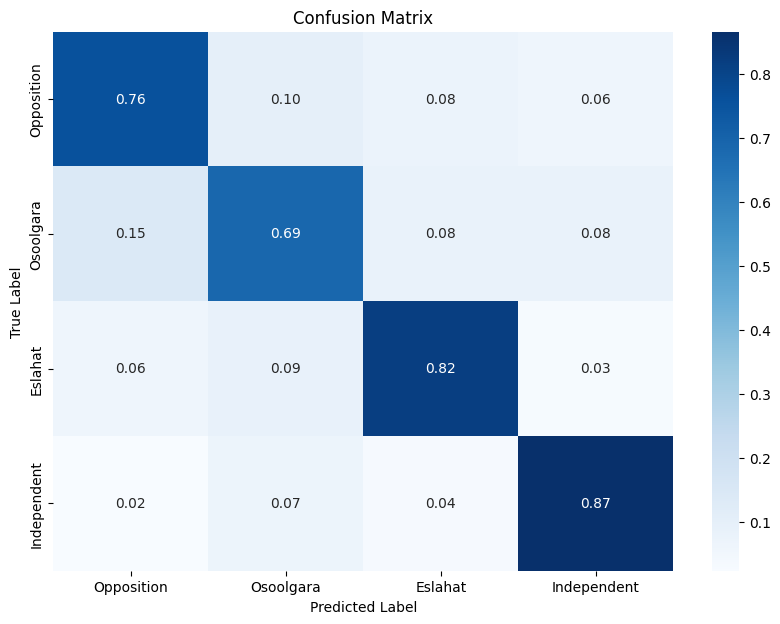

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

class_names = ["Opposition", "Osoolgara", "Eslahat",  "Independent"]#,

cm = confusion_matrix(val_labels_digit, pred_labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt='.2f',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [13]:
import torch

label_map_reverse = {
    0:"Opposition",
    1:"Osoolgara",
    2:"Eslahat",
    3:"Independent"
}

def predict_category(text, model = model, tokenizer = tokenizer):

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model.to(device)
    model.eval()

    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_class = logits.argmax().item()

    print(f'Predicted Class: {label_map_reverse[predicted_class]}')
    return label_map_reverse[predicted_class]


In [14]:
post_opp = "رای بی رای سیرک انتخابات"
predicted_class = predict_category(post_opp)


Predicted Class: Opposition


# Predict target community and find top Fashaness

In [15]:
import networkx as nx
import pandas as pd
import numpy as np
import random

In [16]:
nodes_df = pd.read_csv('/content/drive/MyDrive/graph_data/jalili_nodes.csv')
edges_df = pd.read_csv('/content/drive/MyDrive/graph_data/jalili_edges.csv')

G = nx.DiGraph()

for _, row in nodes_df.iterrows():
    G.add_node(row['Id'],
               Label=row['Label'],
               views=row['views'],
               followers=row['followers'],
               importance=row['importance'],
               posts=row['posts'],
               modularity_class=row['modularity_class'],
               indegree=row['indegree'],
               outdegree=row['outdegree'],
               Degree=row['Degree'],
               closeness_centrality=row['closnesscentrality'],
               betweenness_centrality=row['betweenesscentrality'])

for _, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'], candidate=row['Candidate'])



In [36]:
posts_df = pd.read_excel('/content/drive/MyDrive/channels_data/combined_file.xlsx')

def find_by_label(label, G):
    for node, attrs in G.nodes(data=True):
        if attrs.get('Label') == label:
            return node
    return None

def find_by_modularity_class(modularity_class, G):
    community = []
    for node, attrs in G.nodes(data=True):
        if attrs.get('modularity_class') == modularity_class:
            community.append(node)
    return community


def find_top_high_measure(G, number, measure):
    sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1][measure], reverse=True)
    return [node for node,  _ in sorted_nodes[:number]]

def find_top_high_measure_list(node_list, G, number, measure):
    sorted_nodes = sorted(node_list, key=lambda node_id: G.nodes[node_id].get(measure, 0), reverse=True)
    return sorted_nodes[:number]


def find_refference_nodes(G, indegree_limit):
    refference_nodes = [node for node, attrs in G.nodes(data=True) if attrs['indegree'] > indegree_limit]
    # refference_nodes = [
    #     node for node, attrs in G.nodes(data=True)
    #     if attrs.get('Label') in posts_df['نام کاربری منبع'].values
    # ]
    return refference_nodes

def find_top_bridges(G, bridge_nodes):
    sorted_nodes = sorted(bridge_nodes, key=lambda node_id: G.nodes[node_id].get('indegree', 0), reverse=True)
    return sorted_nodes

def get_post_from(node_label):
  posts = posts_df[posts_df['نام کاربری منبع'] == node_label]['متن مطلب']
  if len(posts) != 0:
    while True:
      post = preprocess_text(random.choice(list(posts)))
      if post:
        return post
  else:
    # print(node_label , " not found")
    return None

In [18]:
def compute_spread_probabilities(G, node):
    incoming_edges = G.in_edges(node, data=True)
    total_weight = sum(edge_data['weight'] for _, _, edge_data in incoming_edges)
    probabilities = {}

    for source, _, edge_data in incoming_edges:
        probabilities[source] = edge_data['weight'] / total_weight

    return probabilities

In [19]:
import matplotlib.pyplot as plt
import copy
import math


def simulate_spread(G, start_node,  disabled_nodes = None, visualization=False , iterations=10):
    reach_counts = []
    G_copy = G.copy()
    if disabled_nodes:
        G_copy.remove_nodes_from(disabled_nodes)

    for iteration in range(iterations):
        if visualization:
            print(f"---------iteration {iteration}--------------")
        visited = set()
        queue = [start_node]
        graphs = []
        reach_count = 0
        while queue:
            current_node = queue.pop(0)
            if current_node not in visited and G_copy.has_node(current_node):
                visited.add(current_node)
                reach_count += 1
                spread_probs = compute_spread_probabilities(G_copy, current_node)
                for neighbor, prob in spread_probs.items():
                    if random.random() < prob:
                        queue.append(neighbor)

            gr = G_copy.copy()
            vi = visited.copy()
            graphs.append([gr, vi])

        # if visualization:
            # draw_multiple_graphs(graphs, iteration)
        reach_counts.append(reach_count)

    return reach_counts

In [28]:
from itertools import islice

def find_top_high_fashaness(G, target_community, number):
    top_high_fashaness = set()

    community_hbt_share = round(0.5 * number)
    community_brg_share = round(0.4 * number)
    totalgraph_hbt_share = round(0.1 * number)

    # Share from target community top betweenness nodes
    target_community_nodes = find_by_modularity_class(target_community, G)
    community_hbt_share = min(community_hbt_share, len(target_community_nodes))
    tops = find_top_high_measure_list(target_community_nodes, G, community_hbt_share ,'betweenness_centrality')
    top_high_fashaness.update(tops)

    # Share from community bridge nodes
    all_possible_bridges = set()
    bridge_nodes = []
    for node in target_community_nodes:
        incoming_neighbors = list(G.predecessors(node))
        all_possible_bridges.update(incoming_neighbors)
    for node in all_possible_bridges:
        if node not in target_community_nodes:
            bridge_nodes.append(node)
    bridge_nodes = find_top_bridges(G, bridge_nodes)
    community_brg_share = min(community_brg_share, len(bridge_nodes))
    top_high_fashaness.update(
        node for node in bridge_nodes
        if node not in top_high_fashaness and len(top_high_fashaness) <= (community_brg_share + community_hbt_share)
    )

    # Share from total graph top betweenness nodes
    tops = find_top_high_measure(G, len(G.nodes()) ,'betweenness_centrality')
    top_high_fashaness.update(
        node for node in tops
        if node not in top_high_fashaness and len(top_high_fashaness) <= number
    )

    return list(top_high_fashaness)

In [38]:
def compare_centrality_measures(length, G):
    seed_nodes = find_refference_nodes(G,10)
    betweenness_disable_diffs = importance_disable_diffs = closeness_disable_diffs = fasha_disable_diffs = 0

    top_high_betweenness = find_top_high_measure(G, 100,'betweenness_centrality')
    top_high_importance = find_top_high_measure(G, 100, 'importance')
    top_high_closeness = find_top_high_measure(G, 100, 'closeness_centrality')

    for i, node in enumerate(random.sample(seed_nodes, length)):

        start_node = node
        print(i+1, "-",G.nodes[start_node]['Label'])

        # post = get_post_from(G.nodes[node]['Label'])
        # if post is None:
        #   continue
        # community = predict_category(post)
        target_community = G.nodes[start_node]['modularity_class']
        # print("Target community: ", target_community)
        # print(post)

        top_high_fasha = find_top_high_fashaness(G, target_community , 100)

        # normal diffusion
        normal_spread_count = simulate_spread(G, start_node, visualization=False, iterations=30)

        # diffusion after disabling top high betweenness node
        disabled_high_betweenness_spread_count = simulate_spread(G, start_node,
                                                                 disabled_nodes=top_high_betweenness, visualization=False, iterations=30)
        # diffusion after disabling top high importance node
        disabled_high_importance_spread_count = simulate_spread(G, start_node, disabled_nodes=top_high_importance, visualization=False, iterations=30)

        # diffusion after disabling top high closeness node
        disabled_high_closeness_spread_count = simulate_spread(G, start_node, disabled_nodes=top_high_closeness, visualization=False, iterations=30)

        # diffusion after disabling top high fashaness node
        disabled_high_fasha_spread_count = simulate_spread(G, start_node, disabled_nodes=top_high_fasha, visualization=False, iterations=30)

        # comparision
        mean_reach = sum(normal_spread_count)/len(normal_spread_count)
        mean_reach_disabled = sum(disabled_high_betweenness_spread_count)/len(disabled_high_betweenness_spread_count)
        mean_reach_disabled2 = sum(disabled_high_importance_spread_count)/len(disabled_high_importance_spread_count)
        mean_reach_disabled3 = sum(disabled_high_closeness_spread_count)/len(disabled_high_closeness_spread_count)
        mean_reach_disabled4 = sum(disabled_high_fasha_spread_count)/len(disabled_high_fasha_spread_count)

        print("Diffusion Result:", normal_spread_count, "mean reach: ",round(mean_reach))
        print("After disabling top Betweenness nodes:", disabled_high_betweenness_spread_count,  "mean reach: ",round(mean_reach_disabled,2))
        print("After disabling top Importance nodes:", disabled_high_importance_spread_count,  "mean reach: ",round(mean_reach_disabled2,2))
        print("After disabling top Closeness nodes:", disabled_high_closeness_spread_count,  "mean reach: ",round(mean_reach_disabled3,2))
        print("After disabling top Fasha nodes:", disabled_high_fasha_spread_count,  "mean reach: ",round(mean_reach_disabled4,2))

        betweenness_disable_diffs += mean_reach - mean_reach_disabled
        importance_disable_diffs += mean_reach - mean_reach_disabled2
        closeness_disable_diffs += mean_reach - mean_reach_disabled3
        fasha_disable_diffs += mean_reach - mean_reach_disabled4

        print("Betweenness disable effect: ", round(betweenness_disable_diffs))
        print("Importance disable effect: ", round(importance_disable_diffs))
        print("Closeness disable effect: ", round(closeness_disable_diffs))
        print("Fasha disable effect: ", round(fasha_disable_diffs))
    return [betweenness_disable_diffs, importance_disable_diffs, closeness_disable_diffs]

In [39]:
compare_centrality_measures(30, G)

1 - farhangian_tabriz
Diffusion Result: [1, 8, 3, 5, 1, 2, 1, 1, 1, 3, 3, 7, 7, 1, 9, 1, 2, 1, 2, 3, 4, 4, 3, 6, 1, 10, 1, 36, 1, 2] mean reach:  4
After disabling top Betweenness nodes: [1, 3, 1, 2, 1, 4, 4, 3, 5, 2, 3, 1, 3, 1, 1, 1, 4, 6, 3, 1, 2, 1, 15, 6, 1, 1, 7, 1, 11, 4] mean reach:  3.3
After disabling top Importance nodes: [3, 1, 5, 3, 6, 4, 1, 3, 1, 2, 10, 3, 1, 4, 1, 6, 2, 1, 11, 1, 4, 1, 1, 1, 1, 2, 4, 1, 4, 4] mean reach:  3.07
After disabling top Closeness nodes: [1, 1, 5, 3, 5, 3, 1, 4, 9, 11, 1, 1, 7, 3, 2, 5, 1, 1, 11, 1, 7, 1, 1, 3, 3, 1, 11, 3, 3, 4] mean reach:  3.77
After disabling top Fasha nodes: [2, 3, 6, 11, 1, 4, 18, 1, 7, 4, 5, 1, 2, 4, 1, 5, 5, 2, 1, 19, 1, 5, 3, 1, 1, 1, 6, 3, 7, 2] mean reach:  4.4
Betweenness disable effect:  1
Importance disable effect:  1
Closeness disable effect:  1
Fasha disable effect:  0
2 - mehrnews
Diffusion Result: [3, 3, 16, 6, 1, 8, 3, 1, 23, 2, 1, 21, 7, 3, 1, 9, 10, 1, 2, 1, 1, 1, 14, 5, 6, 3, 1, 5, 1, 1] mean reach:  5
Afte

[21.766666666666666, 37.1, 5.966666666666665]

In [ ]:
a2, b2, c2 = compare_centrality_measures(100, G)

1 - tasnimnews
Diffusion Result: [1, 6, 1, 8, 1, 3, 1, 3, 1, 11, 7, 7, 6, 1, 1, 1, 5, 2, 2, 2, 2, 1, 1, 4, 8, 9, 3, 2, 2, 3] mean reach:  4
After disabling top Betweenness nodes: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] mean reach:  0.0
After disabling top Importance nodes: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] mean reach:  0.0
After disabling top Closeness nodes: [1, 2, 1, 2, 12, 1, 1, 1, 8, 1, 5, 4, 1, 4, 5, 9, 2, 1, 8, 2, 4, 1, 2, 2, 1, 1, 3, 1, 2, 2] mean reach:  3.0
Betweenness disable effect:  3.5
Importance disable effect:  3.5
Closeness disable effect:  0.5
2 - alaeddin_bourse
Diffusion Result: [1, 1, 2, 1, 1, 2, 4, 1, 2, 2, 3, 2, 3, 1, 2, 2, 2, 2, 19, 2, 3, 4, 1, 4, 1, 1, 1, 1, 3, 4] mean reach:  3
After disabling top Betweenness nodes: [2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 3, 5, 2, 1, 2, 1, 2, 2, 2, 2, 4, 4, 3, 1, 4, 9, 1, 3, 2, 2] mean reach:  2.4
After disabling top Importance no

In [ ]:
a3, b3, c3 = compare_centrality_measures(100, G)

# Sentence Embeddings

In [ ]:
def calc_embeddings(df):
  cleaned_texts = [
        text for text in [preprocess_text(text) for text in df['متن مطلب'].head(50)]
        if len(text.split()) >= 10
  ]
  print(cleaned_texts)
  persian_inputs = tokenizer(cleaned_texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
  with torch.no_grad():
      persian_outputs = model(**persian_inputs)
  post_embeddings =  persian_outputs.pooler_output
  return post_embeddings


def get_mean_embeddings(df):
  post_embeddings = calc_embeddings(df)
  return torch.mean(post_embeddings, dim = 0)

In [ ]:
besazimmmm_mean = get_mean_embeddings(besazimmmm_df)
afsaran_mean = get_mean_embeddings(afsaran_df)
sepahghods_mean = get_mean_embeddings(sap)
baamdadeno_mean = get_mean_embeddings(df5)
entekhab_mean = get_mean_embeddings(df6)

['من شعار تند میدم ولی تو از آزادی بگوبازی کثیف جلیلی و پزشکیان برای کشاندن احمق ها پای صندوق های رایجدال نمایشی دو حرامزاده', 'ولی پزشکیان واقعی اینه اونی که دیشب دیدید را ظریف براش انشاء نوشته بودحسین درودیان', 'ریاست جمهوری پزشکیان، مانع ظهور امام زمان است اعلامیه پخش شده طرفداران سعید جلیلی در دامغان ریاست جمهوری پزشکیان، مانع ظهور امام زمان است پزشکیان ضدانقلاب است و اگر رای بیاورد، میخواهند روز شنبه، اول محرم، رقص و پایکوبی برگزار کند با پیروزی سعید جلیلی، امام زمان زودتر ظهور میکنند انتخابات ١۵ تیر، آخرین انتخابات ج ا است', 'دفتر امام زمان ع طی اطلاعیه ای به امت شیعه گریزان از تفکر فرمودند که به علت تقارن روز جمعه و مرحله دوم رای گیری این جمعه ظهور نخواهند کرد ، و تصمیم دارند تا ظهر بخوابند ، لطفا با عرعر مهدی بیا مزاحم خواب ایشان نشویدو من الله توفیقدفتر امام زمان در آسمان هفتم', 'اگر تفاوتی بین این دو میبینید یعنی هنوز شما جا دارید تا آخوند کونتون بزاره رک گفتم که قشنگ متوجه بشید', 'روباه مکار به صحنه برگشت، غافل از اینکه مردم دیگه پینوکیو نیستند سیرک انتخابات', 'برای سابقه قا

# Find Similarities

In [ ]:
import torch.nn.functional as F

def similarity(embeddings_1, embeddings_2):
    normalized_embeddings_1 = F.normalize(embeddings_1, p=2)
    normalized_embeddings_2 = F.normalize(embeddings_2, p=2)
    return torch.matmul(
        normalized_embeddings_1, normalized_embeddings_2.transpose(0, 1)
)

def similarity1(embeddings_1, embeddings_2):
    return torch.matmul(
        embeddings_1, embeddings_2.transpose(0, 1)
)

def cosine_similarity(tensor1, tensor2):
    return F.cosine_similarity(tensor1.unsqueeze(0), tensor2.unsqueeze(0))

In [ ]:
def get_highest_similarity(embedding, df):
  best_tensor = None
  best_similarity = float('-inf')
  embedings = calc_embeddings(df)
  for embed in embedings:
    similarity = cosine_similarity(reference_tensor, tensor)
    print(f"Similarity: {similarity.item()}")
    if similarity > best_similarity:
        best_similarity = similarity
        best_tensor = tensor
  print(best_similarity, best_tensor)
  return best_similarity

In [ ]:
df_test = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/channel_data/osoolgara/bisimchimedia2000.xlsx')
sum = 0
gen = 0

for post in df_test['متن مطلب'][1400:1500]:
  text = preprocess_text(post)
  if len(text.split()) >=10:
    gen += 1
  else:
    continue

  persian_input = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
  with torch.no_grad():
      persian_output = model(**persian_input)
  post_embedding = persian_output.pooler_output
  get_highest_similarity()

In [ ]:
df_test = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/channel_data/osoolgara/bisimchimedia2000.xlsx')
sum = 0
gen = 0

for post in df_test['متن مطلب'][1400:1500]:

  text = preprocess_text(post)
  if len(text.split()) >=10:
    gen += 1
  else:
    continue

  persian_input = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
  with torch.no_grad():
      persian_output = model(**persian_input)
  post_embedding = persian_output.pooler_output

  sim_with_osolgara = similarity1(afsaran_mean, post_embedding)
  sim_with_oposition = similarity1(besazimmmm_mean, post_embedding)
  print(sim_with_osolgara, sim_with_oposition)
  if sim_with_oposition < sim_with_osolgara:
    sum += 1
  else:
    print(text)

print(sum," ",  gen)
print("SUM = ", sum/gen)

tensor([10.8200]) tensor([16.0253])
قالیباف مدیر پروژهای نیستم ؛ مدیر پروسهای هستمیکی اشتباهات زیرساختی پیوست فرهنگی درست حتما حضور مؤثر ، قدرتمندانه حکمرانی فضای مجازی داشته_باشیم جلوی ولانگاری بگیریم امروز پنجره طلایی جمعیت اقتصاد بازیهای اینترنتی بالای ۲۰۰ میلیارد دلار صرفا ۱۰ میلیون دلار
tensor([6.9370]) tensor([12.0500])
معمولا اولینها یاد میمونن کسب درآمد ، دوستی باری تلاش کنی سرنوشت کشورت سهیم باشی هشتادی ها جمعه پای صندوق رای انتخابتون خاطره
tensor([9.7278]) tensor([12.2376])
زاکانی دختران پسران عزیزم ، حضور شعبهای رای آینده خودتان خودتان رقم بزنید
tensor([9.0153]) tensor([8.8119])
tensor([13.6086]) tensor([12.5424])
tensor([14.0497]) tensor([13.7443])
tensor([9.7464]) tensor([10.9856])
وعده مسکن قالیباف کارگر کارمند بتواند درآمد ۷ ٫ ۵ سالش خانه بخرد
tensor([15.1485]) tensor([13.7452])
tensor([11.8695]) tensor([14.5554])
حمله حزب الله ۲۰۰ موشک ۲۰ پهپاد رژیم صهیونیستی حملات امروز انتقام شهادت حاج ابو نعمه انجام لحظه ۲۰۰ موشک ۲۰ پهپاد اهدافی شمال اراضی اشغالی شلیک
tensor([10.2180

In [ ]:
text

'برخورد وحشیانه کفتارهای کثیف گشت ارشاد با یک دختر در تهران سيرك انتخابات'

In [ ]:
similarity1(afsaran_mean, post_embedding)

tensor([9.0942])

In [ ]:
similarity1(besazimmmm_mean, post_embedding)

tensor([9.9583])

In [ ]:
similarity1(post_embedding, post_embeddings)

NameError: name 'post_embeddings' is not defined